In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [86]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

In [87]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
def db_scan_search(eps_test, min_samp):
    db = DBSCAN(eps=eps_test, min_samples=min_samp).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    labels_, counts = np.unique(labels, return_counts=True)
    print(eps_test, min_samp)
    print(counts)
    print('x'*50)
    return db

### Seems to work best with eps between .2 and.3 and with min 10 or above

In [94]:
eps_test = np.linspace(.2,.3,20)
for x in eps_test:
    for y in range(7,15):
        db_scan_search(x,y)

0.2 7
[16636 16111  3228  7544  1085    20    12     9    97    17    26     7
    15    11    13   234    26    30     7     6     6    10    11    10
     7    52     7    11     7     8     7     8    12    10    18     7
     9     3     5     6     6     5     8     9     5     6     6    12
    12     6     7    14    12     7    26    11    14    28     7    31
    12    11     6     3     6     8     8    11     7     7     5     9
     7     7     7     8    10    16     7    12     5    23     9    10
     8    13     9    20     9    14     8     7     8    11    10     7
     7    78    10     6     7     8    10     8     9     4    11     5
     7     6     7     8     5    10    17    13     5     7    10     7
    12     7     5     4     6     7     5     8     6     7     7     8
     7     4     7     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2 8
[17748 15839  7355  3029   978    19    48    26    13    22    13   160
    17    11    13    10     9    1

0.2105263157894737 8
[16374 16246  3338  7699   265  1167    26   107    38     8    15    13
    17    14    15    27    14     7    11     8    92    10    12     7
     8    13    11    11     8    14     6     8     9     6    13    11
     7    12     8    22    17    16    46     8     8    10     8     7
     7     7     9     8    16    12     5    21    11    13     8    10
    10    13    12    14     9     7     8     8     9     7    81     9
     4     8     8     9     8     7     9     8     8    10    11    12
     8     8    11     7     8     8     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2105263157894737 9
[17254 16072  3200  7550   208  1088    82    25    11    13    18    17
     9    12     8    11    47    10    12    14    13    14     7     9
    21    27    12     8    10    10    15    13    21     8    13     7
     9     9     9     9     7    16    14     5    21     9     9    12
     9     9     7    12    76     8     9    15     9     9

0.2210526315789474 11
[17702  3157 15852  7534   173  1053    72    31    17     8     7    37
    11    11    10     8    17    26     7     9    11    10    18    14
    11    11    12    11     4    12    20    13   186     8    73    13
     7     9     7    11     5    10     9    18    11     6    11    11
     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 12
[18386  3050 15728  7381   128   973    22    13    22    11     7     9
    16    33    26    10    16    31    10    16    12    12    10    10
    12    19     4     9   187    11    13    42    30    10     9    13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 13
[19026 15502  7234  2929   921   105    17    11    26    31     6    18
    13    13    14     7    10    12    18   150    12    10    31    40
    27    11    37    13    10     8    10     6    13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 14
[19640 15261  7110  2514   867    17 

0.2368421052631579 8
[13689 16886  1525  3925  8402   654    28   268    13     8    21    12
     5     8     8    19     8    12     8    10    26    12    11     8
     8    14     8    97     8    15    12    10    26    42    18    17
     6     7     5     8    15    35    15    14    13     9     6    10
     9     8     8    10     8   111     8     8    13     7    10     9
     8     8     9     8     9     7     8     3     6     9     8     7
     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2368421052631579 9
[14562 16680  3800  8240  1468   586   192     6    13    14    22     7
    12    19    18    15    14    29    88    12    24     8    26    43
    21    16    22    17     7     6     9    36    14     7    10    10
     9     9    11    98     7     8    11    10    13     9     9     9
     6     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2368421052631579 10
[15224 16544  3687  8133  1401   439   157    12    18    41    10    12
     8   

0.25263157894736843 7
[11825 17315  1950  4280  8728   845   182   391    12    12     8    11
     9     9    10    11     7     5     7    19     9    10     8     6
     8    11     7     8    24     7     7     4    36     8     8    11
     7     9     3     6    11    10     7    17     7     9     7     7
     3     9    17     7    29    10     8    14   121     8    12     7
     6     9     9     7     9     6     7     7     7     7     7     8
     5     6     7     8     7     9     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.25263157894736843 8
[12500 17176  1852  4180  8611   787   348    13    13     2    24     5
     9    14    10     6     7    18     8     8     8    50   123     8
     6    23    35     8    18    10     8    10    10    16    14    13
     8    14    10     8     8    14   121     8     8     3    12     7
     8    10     6     8     7     9    13     8     6     6     6     8
     8     8     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

0.26842105263157895 8
[11514 17559  2018  4354  8829   882   419   217    15     7     9    10
     8     8    11     7     6    11     9     8     5     5     6     9
    23    46    11     8     7     8     8    17     8     8     8    17
     8    37    10     8     8    13    17     9     6    10     7    10
     5     4     5     8     8     6     9     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 9
[12093 17451  1924  4291  8722   852   396    13    10   193    10     8
     6    11     4     6     9     9     6     4     6    20    43     9
     6     9    17    16    18     6    24     6    10    14    11     9
    10     9     9     5     7     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 10
[12774 17318  1872  4207  8603   806   352     8    13    10     6   170
    19    37    19    13    18    16    11    10     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 11
[13294 17069  1710  4090  852

0.28421052631578947 10
[11834 17540  1997  4339  8799   857   416   208     9    10     7    12
     9    10    21    48    22    10    10    19    10     8    22    15
    16     9    12    10     6     6]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 11
[12302 17325  1944  4270  8692   828   391     9     5    12   187    18
    44    23    13    17     8    11    19    10   120    11    10    11
    11]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 12
[12772 17203  1858  4204  8622   782   364    13    23     6    12   178
    39    18    21    15    18    10    16   117]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 13
[13183 17102  1665  4132  8554   746   311    13    23     9    31    63
   166    39    18    14     7    14    16   106     9    16    12    16
    17     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 14
[13625 17026  1593  4035  8513   706   275    13    24    23

### dbscan .3 and 11

In [10]:
# db = DBSCAN(eps=.3, min_samples=11).fit(X)
db = db_scan_search(.3,11)

0.3 11
[11408 17533  2045  4433  8901   903   439    20   239    10    10    63
    10    11     9    20    11    27    14   120    19    10     9     8
     6    13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [98]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

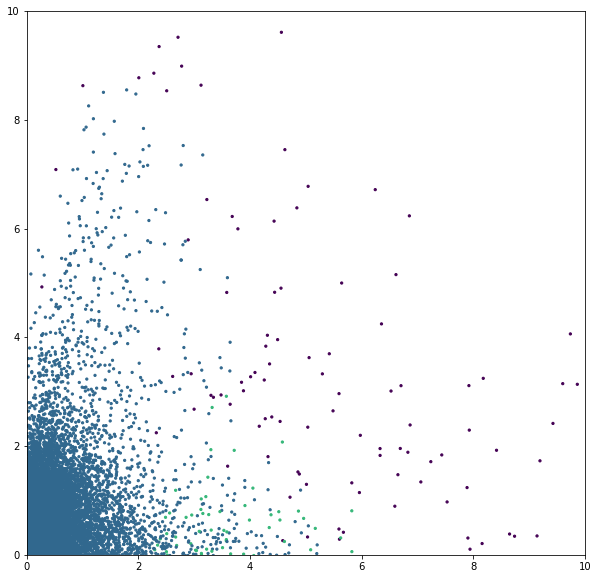

In [99]:
labels = db.labels_
labels_, counts = np.unique(labels, return_counts=True)
labels_
plt.figure(figsize=[10,10])
# legend = np.linspace(-1,len())
plt.xlim(0,10)
plt.ylim(0,10)
plt.scatter(pca_one, pca_two, c=db.labels_, s=5)


In [100]:
db.labels_

array([ 0,  0,  0, ...,  0,  0, -1])

In [101]:
df['db_labels']=db.labels_

In [12]:
df.to_csv('data/df_dblabels.csv')

In [14]:
with open('data/db_point3_11.p','wb') as write_file:
    pickle.dump(db,write_file)

In [88]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### DBA EPS 2 Min Samples 30

In [97]:
# db = DBSCAN(eps=.3, min_samples=11).fit(X)
db = db_scan_search(2,30)

2 30
[  384 44868   912   126]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [134]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]


array([-0.20021382, -0.36877103,  0.06896375, ..., -1.17750502,
       -1.4055011 ,  3.05870156])

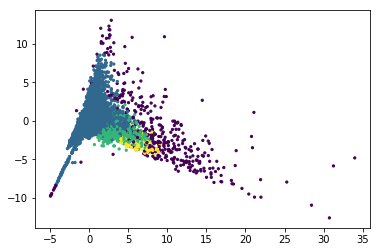

In [103]:
plt.scatter(pca_one, pca_two, c=db.labels_, s=5)

In [104]:
df_2_30 = df
df_2_30['db_labels'] = db.labels_

In [106]:
df_2_30.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.016850
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,0.196474
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,0.000000
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,0.000000
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,2.000000


In [109]:
df_2_30[df_2_30.db_labels==2].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,1.260000e+02,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0
mean,3.371511e+09,42.547619,18.373016,2.0,0.011308,4292.690118,0.182540,41.910368,-87.656960,3.142857,0.011266,2.0
std,3.135773e+09,53.309002,10.796099,0.0,0.009976,2753.314369,0.407937,0.041373,0.024759,2.804894,0.004784,0.0
min,1.040010e+08,0.000000,0.000000,2.0,0.000135,714.328985,0.000000,41.794141,-87.720107,0.000000,0.000314,2.0
25%,6.482510e+08,0.000000,10.250000,2.0,0.003613,2105.551772,0.000000,41.884285,-87.671871,1.000000,0.008520,2.0
50%,2.414502e+09,21.000000,19.000000,2.0,0.008723,4131.272058,0.000000,41.901188,-87.659152,2.000000,0.011379,2.0
75%,8.308252e+09,71.250000,25.000000,2.0,0.014999,5363.154460,0.000000,41.939438,-87.635006,4.000000,0.015015,2.0
max,8.410001e+09,260.000000,43.000000,2.0,0.039389,13972.553730,2.000000,42.008624,-87.612723,13.000000,0.020412,2.0


In [108]:
df_2_30[df_2_30.db_labels==1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,9.120000e+02,912.000000,912.000000,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.0
mean,3.292189e+09,47.014254,12.941886,1.0,0.017528,3740.257919,0.086623,41.906282,-87.673647,3.221491,0.011613,1.0
std,2.942895e+09,65.075274,10.304684,0.0,0.015186,2295.517198,0.281436,0.060702,0.044328,3.541081,0.005592,0.0
min,1.020120e+08,0.000000,0.000000,1.0,0.000414,337.524862,0.000000,41.685685,-87.817285,0.000000,0.000393,1.0
25%,8.150018e+08,0.000000,5.000000,1.0,0.006936,1834.829328,0.000000,41.880058,-87.696962,1.000000,0.007435,1.0
50%,2.403001e+09,24.000000,10.000000,1.0,0.012798,3845.434789,0.000000,41.910933,-87.668150,2.000000,0.011507,1.0
75%,4.610001e+09,69.250000,18.000000,1.0,0.023725,5034.332208,0.000000,41.952903,-87.646390,4.000000,0.015664,1.0
max,9.801001e+09,455.000000,55.000000,1.0,0.080315,13972.553730,1.000000,42.019262,-87.551941,20.000000,0.029228,1.0


In [107]:
df_2_30[df_2_30.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.486800e+04,44868.000000,44868.000000,44868.0,44868.000000,44868.000000,44868.0,44868.000000,44868.000000,44868.000000,44868.000000,44868.0
mean,4.585685e+09,56.847419,1.736360,0.0,0.034653,4042.527494,0.0,41.842923,-87.682872,1.546291,0.014175,0.0
std,2.763511e+09,70.705939,3.981537,0.0,0.027201,3306.976334,0.0,0.098300,0.065209,2.452222,0.007760,0.0
min,1.010010e+08,0.000000,0.000000,0.0,0.000209,337.524862,0.0,41.644696,-87.921381,0.000000,0.000055,0.0
25%,2.001001e+09,10.000000,0.000000,0.0,0.015229,1384.259708,0.0,41.759101,-87.725795,0.000000,0.009113,0.0
50%,4.909021e+09,42.000000,0.000000,0.0,0.027056,3272.478661,0.0,41.845448,-87.681067,1.000000,0.013481,0.0
75%,7.005014e+09,77.000000,1.000000,0.0,0.046310,5428.548635,0.0,41.929933,-87.639751,2.000000,0.018139,0.0
max,9.801001e+09,1021.000000,55.000000,0.0,0.173106,13972.553730,0.0,42.023024,-87.524730,34.000000,0.131298,0.0


### DBA EPS Eps 1.5 Samples 25

In [112]:
db = db_scan_search(1.5,25)

1.5 25
[  547 44762   858   108    15]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [157]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]
df_1p5_25 = df
df_1p5_25['db_labels'] = db.labels_
df_1p5_25['pca_one'] = pca_one
df_1p5_25['pca_two'] = pca_two


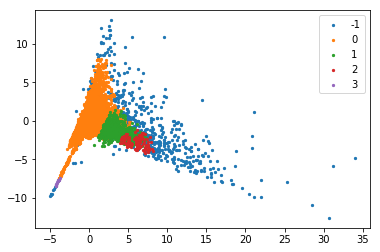

In [158]:
for dblabel in np.unique(db.labels_):
    df = df_1p5_25[df_1p5_25.db_labels == dblabel]
    df_pca_one = df.pca_one
    df_pca_two = df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()


In [114]:
df_1p5_25 = df
df_1p5_25['db_labels'] = db.labels_

In [115]:
df_1p5_25.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.012357
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,0.206032
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,0.000000
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,0.000000
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,3.000000


In [116]:
df_1p5_25[df_1p5_25.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.476200e+04,44762.000000,44762.000000,44762.0,44762.000000,44762.000000,44762.0,44762.000000,44762.000000,44762.000000,44762.000000,44762.0
mean,4.585450e+09,56.369398,1.709642,0.0,0.034655,4041.380342,0.0,41.842854,-87.682880,1.522363,0.014142,0.0
std,2.762698e+09,68.438191,3.869568,0.0,0.027183,3308.334026,0.0,0.098306,0.065059,2.349037,0.007506,0.0
min,1.010010e+08,0.000000,0.000000,0.0,0.000209,337.524862,0.0,41.644696,-87.918870,0.000000,0.000055,0.0
25%,2.001001e+09,10.000000,0.000000,0.0,0.015247,1384.259708,0.0,41.758995,-87.725808,0.000000,0.009117,0.0
50%,4.909021e+09,42.000000,0.000000,0.0,0.027067,3272.478661,0.0,41.845277,-87.681130,1.000000,0.013481,0.0
75%,7.005014e+09,77.000000,1.000000,0.0,0.046281,5428.548635,0.0,41.929947,-87.639893,2.000000,0.018138,0.0
max,9.801001e+09,933.000000,48.000000,0.0,0.173106,13972.553730,0.0,42.023024,-87.524730,28.000000,0.116151,0.0


In [26]:

for y in range(20,50):
    db_scan_search(1,y)

1 20
[21897    55    25    31  3802   135    28   106    69    26    24   648
   122    20    42    50    20    40   133    56    39   148    45    56
    27    66    20    21    39   107   131    36    30    36    55    72
   113   110    75    45    23    53    54   220    71    31    60    42
    33    50   118    61    25    39    64    51   255    99    82    24
    65    43    35    52   109   182   143    21   144    56    30   135
    59   143   118    45    20    41    23    34    34    20    21    41
    28    30    71    33    36    37    79    92    35    21    26    30
    62    69    22    27    84    46    27   134    25    27    29    91
    64    25    23    54   126    78    25    29   155    64    87    55
    55   118    94   124   100    54    86   153    99    41    29    26
    69    30    26   104    24    28   129   150   166   138    21    70
   119   102    68    32    58    30    21    43    78    58   112    81
    48    49    82   174    24    33    28    

1 24
[23658    55    25    31  3802   135    28   106    69    26    24   648
   122    42    50    40   133    56    39   148    45    56    27    66
    39   107   131    36    30    36    55    72   113   110    75    45
    53    54   220    71    31    60    42    33    50   118    61    25
    39    64    51   255    99    82    24    65    43    35    52   109
   182   143   144    56    30   135    59   143   118    45    41    34
    34    41    28    30    71    33    36    37    79    92    35    26
    30    62    69    27    84    46    27   134    25    27    29    91
    64    25    54   126    78    25    29   155    64    87    55    55
   118    94   124   100    54    86   153    99    41    29    26    69
    30    26   104    24    28   129   150   166   138    70   119   102
    68    32    58    30    43    78    58   112    81    48    49    82
   174    24    33    28    32    28    76    70    92    24    71   167
    96   174    88    26    34    40    70    

KeyboardInterrupt: 

In [31]:
db_1_50=db_scan_search(1,50)

1 50
[29128    55  3802   135   106    69   648   122    50   133    56   148
    56    66   107   131    55    72   113   110    75    53    54   220
    71    60    50   118    61    64    51   255    99    82    65    52
   109   182   143   144    56   135    59   143   118    71    79    92
    62    69    84   134    91    64    54   126    78   155    64    87
    55    55   118    94   124   100    54    86   153    99    69   104
   129   150   166   138    70   119   102    68    58    78    58   112
    81    82   174    76    70    92    71   167    96   174    88    70
    63    66    56    69   495   111   121    59    56    58   115    77
    67    69    67    96    52   130    81    72    62   103   134    98
    93    50    56    60    61    77    97    71    71    74    61    58
    56    61    52    73    64    71   116]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [73]:
pca_df=pd.DataFrame(pca_result)
pca_df['db_labs']=db_1_50.labels_
no_noise_pca = pca_df[pca_df.db_labs!=-1]

pca_one = no_noise_pca[0]
pca_two = no_noise_pca[1]
pca_labels = no_noise_pca.db_labs
pca_one.max()

24.974967811016697

In [34]:
df_db_1eps_50min.to_csv('data/db_df_1eps_50min.csv')

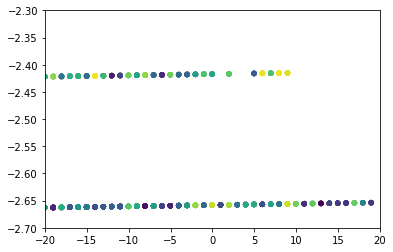

In [84]:
labels = db_1_50.labels_
labels_, counts = np.unique(labels, return_counts=True)
labels_
plt.xlim(-20,20)
plt.ylim(-2.7,-2.3)
plt.scatter(pca_one, pca_two, c=pca_labels, s=20, alpha=.1)

## New heading